In [1]:
print('Vakratunda Mahakaya Suryakoti Samaprabha Nirvignam Kurmedevo Sarvakareshu Sarvada')

Vakratunda Mahakaya Suryakoti Samaprabha Nirvignam Kurmedevo Sarvakareshu Sarvada


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [5]:
df = pd.read_csv(r'data/stud.csv')
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


We will all columns as features and predict the maths score

In [25]:
x = df.drop(columns='math_score')
y = df['math_score']

* Create columns transform with three types of transform
* ie in gender we have 2 categories and race 5.....So standaardise that

* We need to perform OnHotEncoding for categorical
* The when every features are in numbers then we need to perform Standardisation

In Machine Learning (ML), a pipeline refers to a structured sequence of data processing and modeling steps that are chained together to automate the ML workflow. It helps make the entire process—from raw data to predictions—repeatable, organized, and efficient.

In [ ]:
#Pipline
# This is only for x as it containes both num and cat
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", categorical_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])


In [29]:
X = preprocessor.fit_transform(x)

In [31]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [33]:
x_train.shape, x_test.shape

((800, 19), (200, 19))

**Create a Evaluate function and give all Metrics after model training**

In [44]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    R2 = r2_score(true, predicted)

    return mae, rmse, R2

In [45]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806




c:\Users\Harsh Narayankar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Harsh Narayankar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2494
- Mean Absolute Error: 5.6090
- R2 Score: 0.7840


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.9142
- Mean Absolute Error: 6.2950
- R2 Score: 0.7426


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3290
- Mean Absolute Error: 1.8426
- R2 Score: 0.9759
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9191
- Mean Absolute Error: 4.5723
- R2 Score: 0.8560


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
--

In [49]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": model_list,
    "R2 Score": r2_list
})

In [48]:
results_df

,Model,R2 Score
0,Linear Regression,0.880433
1,Lasso,0.825320
2,Ridge,0.880593
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.742601
5,Random Forest Regressor,0.856020
6,XGBRegressor,0.827797
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.849854


As we get highest accuracy in Linear Regression so we will use that 

In [50]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [51]:
lin_model.score(x_test,y_test)

0.8804332983749564

Plotting it

Text(0, 0.5, 'Predicted')

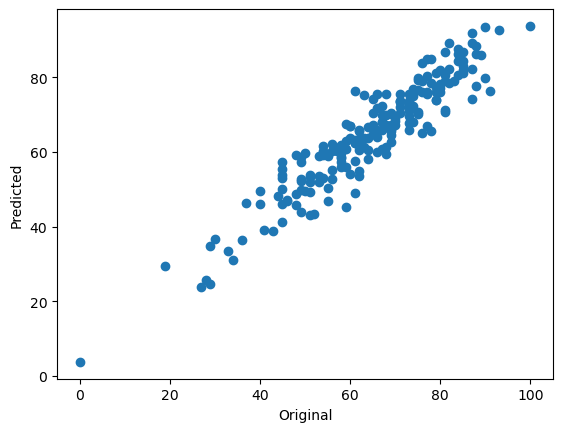

In [61]:
plt.scatter(y_test,lin_model.predict(x_test))
plt.xlabel("Original")
plt.ylabel("Predicted")

If our model was 100% then all the points would lie around the diagonal x=y

<Axes: xlabel='math_score'>

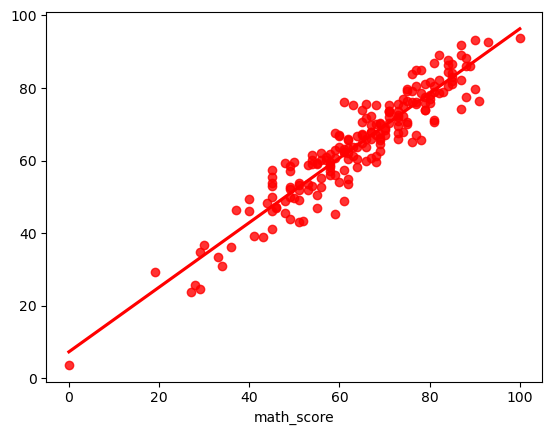

In [72]:
sns.regplot(x=y_test, y=lin_model.predict(x_test), ci=None, color='red')

Difference between the actucal value and predicted value

In [73]:
pd.DataFrame({
    "Actual value": y_test,
    "Predicted Value": lin_model.predict(x_test),
    "Defference": y_test-lin_model.predict(x_test)
})

,Actual value,Predicted Value,Defference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
